In [51]:
import os
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmocean
import gsw
from seabird.cnv import fCNV

from cast_to_xarray import *

# Cartopy for producing maps
import cartopy.crs as ccrs                   # import projections
import cartopy.feature as cf                 # import features

import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.geoaxes import GeoAxes
import matplotlib.ticker as mticker

# Get all casts as xarray using function

In [52]:
data_dir = 'data_cruise1'

castxr4 = cast_to_xarray(data_dir+'/Station4_TSwift_loop_filter_teos10_bin.cnv', 4)
castxr5 = cast_to_xarray(data_dir+'/Station5_loop_filter_teos10_bin.cnv', 5)
castWF = cast_to_xarray(data_dir+'/StationWF_loop_filter_teos10_bin.cnv', 1)
castRace = cast_to_xarray(data_dir+'/TheRace_loop_filter_teos10_bin.cnv', 2)

# Combine casts

In [60]:
# combine all the casts into one xarray dataset
ctdsection = xr.concat([cast4xr,cast5xr,castWFxr, castRacexr],"cast")
#ctdsection

In [61]:
# calculate distance
d = gsw.distance(ctdsection.longitude.values,ctdsection.latitude.values)/1e3 # km
dist = np.cumsum(np.hstack([0,d]))

# add distance coordinate
ctdsection = ctdsection.assign_coords({'distance' : xr.DataArray(dist, coords=[ctdsection.station], dims='cast')})

ctdsection.distance.attrs['units'] = 'km'
#ctdsection

In [62]:
# add units for others
ctdsection.depth.attrs['units'] = 'm'
ctdsection.temperature.attrs['units'] = 'degree C'
ctdsection.salinity.attrs['units'] = 'psu'

# Map to understand plot

Text(-73.7, 41.74, 'CTD stations')

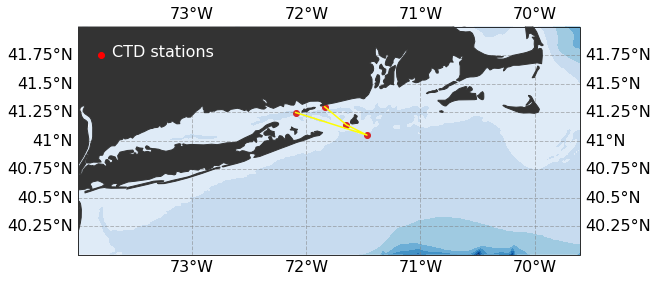

In [63]:
extent = [-74,-69.6,40,42]

# Download ETOPO1 topography for the domain(this may take a minute)
url = 'http://geoport.whoi.edu/thredds/dodsC/bathy/etopo1_bed_g2'
bat = xr.open_dataset(url)
bat = bat.sel(lon=slice(extent[0],extent[1]),lat=slice(extent[2],extent[3]))

projection = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=(9, 13),
                           subplot_kw=dict(projection=projection))
ax.set_extent(extent)

# Plot topography
bat['topo'].plot.contourf(
        ax=ax,levels=np.linspace(-500,100,10),add_colorbar=False,extend='neither',cmap='Blues_r',transform=projection)

_ = ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                                edgecolor='face', facecolor='0.2'),
                                                zorder=3)

# plot ADCP track
plt.plot(ctdsection.longitude, ctdsection.latitude, color='yellow')

# plot CTD stations
ctdsection.plot.scatter('longitude', 'latitude', color='tab:red')#,transform=projection)

gl = ax.gridlines(draw_labels=True,linewidth=1, color='gray', alpha=0.5, linestyle='--')

plt.plot(-73.8, 41.75,'ro',transform=projection,zorder=5)
plt.text(-73.7,41.74,'CTD stations',color='w',transform=projection,zorder=5)

# Plotting sections

Text(0.5, 1.0, 'Temperature Section')

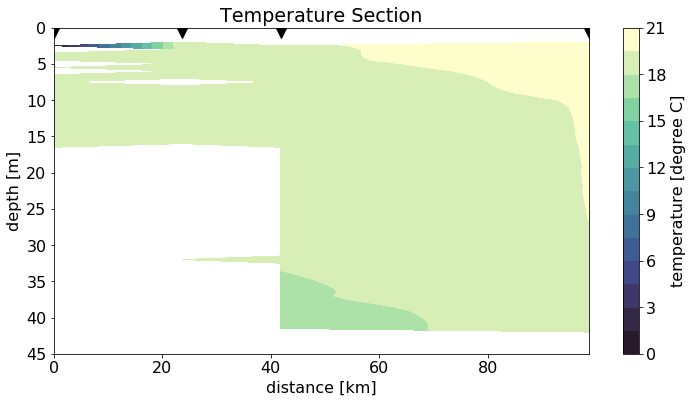

In [57]:
def beautifications(ax):
    ax.plot(ctdsection.distance,ctdsection.distance.size*[0],
             'kv',markersize=20)
    ax.set_ylim(45,0)
#    ax.set_xlim(-.5,10)
    
fig = plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size': 16})

ax = fig.add_subplot(111)
ctdsection.temperature.plot.contourf('distance','depth',levels=20,cmap=cmocean.cm.deep_r)
beautifications(ax)

plt.title("Temperature Section")

# plt.savefig('Figures/temperaturesection789.png')

Text(0.5, 1.0, 'Salinity Section')

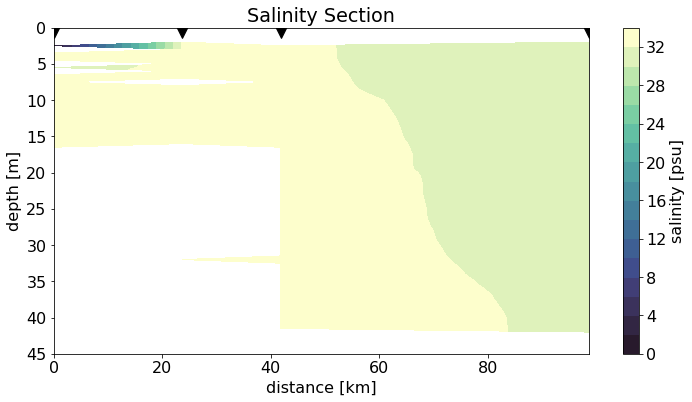

In [58]:
def beautifications(ax):
    ax.plot(ctdsection.distance,ctdsection.distance.size*[0],
             'kv',markersize=20)
    ax.set_ylim(45,0)
#    ax.set_xlim(-.5,45.25)
    
fig = plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size': 16})

ax = fig.add_subplot(111)
ctdsection.salinity.plot.contourf('distance','depth',levels=20,cmap=cmocean.cm.deep_r)
beautifications(ax)

plt.title("Salinity Section")

#plt.savefig('Figures/salinitysection789.png')